In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("Data/combined_zpallagi.csv")

df

id  year State  new_agi_stub   Returns    Single     Joint  \
0        0  2012    AL           1.0  889920.0  490850.0  129070.0   
1        1  2012    AL           2.0  491150.0  194370.0  159200.0   
2        2  2012    AL           3.0  254280.0   68160.0  148960.0   
3        3  2012    AL           4.0  160160.0   23020.0  126140.0   
4        4  2012    AL           5.0  183320.0   15880.0  161260.0   
...    ...   ...   ...           ...       ...       ...       ...   
3055  3055  2021    WY           2.0   62380.0   37690.0   13720.0   
3056  3056  2021    WY           3.0   41880.0   19230.0   17470.0   
3057  3057  2021    WY           4.0   29940.0    8390.0   18900.0   
3058  3058  2021    WY           5.0   48470.0    6940.0   39750.0   
3059  3059  2021    WY           6.0   16510.0    2320.0   13250.0   

      Hd_of_Hshld     AGI_Amt  Total_Inc_Returns  Total_Inc_Amt  \
0        256900.0  11517112.0                NaN            NaN   
1        123350.0  17617800.0                NaN            NaN   
2         31480.0  15644666.0                NaN            NaN   
3          9030.0  13885434.0                NaN            NaN   
4          4890.0  24641055.0                NaN            NaN   
...           ...         ...                ...            ...   
3055       9640.0   2285287.0            62380.0      2304643.0   
3056       4140.0   2589462.0            41880.0      2612378.0   
3057       2000.0   2607510.0            29940.0      2626192.0   
3058       1270.0   6638046.0            48470.0      6694384.0   
3059         90.0  16440472.0            16510.0     16540579.0   

      Std_Ded_Charity_Returns  Std_Ded_Charity_Amt  Std_Ded_Returns  \
0                         NaN                  NaN              NaN   
1                         NaN                  NaN              NaN   
2                         NaN                  NaN              NaN   
3                         NaN                  NaN              NaN   
4                         NaN                  NaN              NaN   
...                       ...                  ...              ...   
3055                  13910.0               4413.0          61080.0   
3056                  12900.0               4808.0          40230.0   
3057                  10260.0               4350.0          28260.0   
3058                  21030.0               9827.0          44610.0   
3059                   6700.0               3291.0          10920.0   

      Std_Ded_Amt  Itemized_Ded_Returns  Itemized_Ded_Amt  Charitable_Returns  \
0             NaN               62120.0          850798.0             46490.0   
1             NaN              129230.0         1914481.0            103450.0   
2             NaN              112550.0         1914831.0             96530.0   
3             NaN               91800.0         1770415.0             81870.0   
4             NaN              141580.0         3383365.0            131170.0   
...           ...                   ...               ...                 ...   
3055    1012492.0                1420.0           39196.0               880.0   
3056     761153.0                1670.0           46867.0              1170.0   
3057     612601.0                1510.0           44815.0               820.0   
3058    1059121.0                3770.0          136387.0              3170.0   
3059     261640.0                5080.0          806565.0              4550.0   

      Charitable_Amt  
0           121095.0  
1           358997.0  
2           404644.0  
3           406140.0  
4           849342.0  
...              ...  
3055          4704.0  
3056          9373.0  
3057          7024.0  
3058         43246.0  
3059        571537.0  

[3060 rows x 19 columns]

In [37]:
import pandas as pd

# Load your data
data = pd.read_csv('Data/combined_zpallagi.csv')

# Filter out rows where 'Itemized_Ded_Amt' or 'Returns' are null
filtered_data = data.dropna(subset=['Itemized_Ded_Amt', 'Returns'])

# Ensure 'Year' column is an integer or a proper format if it's not already
filtered_data['year'] = filtered_data['year'].astype(int)

# Aggregate data by state and year to calculate the total Itemized_Ded_Amt and Returns per state per year
state_year_itemized_aggregated_adjusted = filtered_data.groupby(['State', 'year']).agg({
    'Itemized_Ded_Amt': 'sum',
    'Returns': 'sum'
}).reset_index()

# Calculate the percentage of Itemized Deductions to Returns
state_year_itemized_aggregated_adjusted['Itemized_Ded_to_Returns_Percent'] = (
    state_year_itemized_aggregated_adjusted['Itemized_Ded_Amt'] / state_year_itemized_aggregated_adjusted['Returns']
)

# Output the results
state_year_itemized_aggregated_adjusted


State  year  Itemized_Ded_Amt   Returns  Itemized_Ded_to_Returns_Percent
0      AK  2012         1795050.0  358990.0                         5.000279
1      AK  2013         1652072.0  355150.0                         4.651758
2      AK  2014         1614778.0  357640.0                         4.515093
3      AK  2015         1664004.0  358650.0                         4.639632
4      AK  2016         1652515.0  344240.0                         4.800474
..    ...   ...               ...       ...                              ...
505    WY  2017         1710573.0  266070.0                         6.429034
506    WY  2018          904523.0  268140.0                         3.373324
507    WY  2019          863288.0  274980.0                         3.139457
508    WY  2020          866190.0  276680.0                         3.130656
509    WY  2021         1087007.0  274770.0                         3.956061

[510 rows x 5 columns]

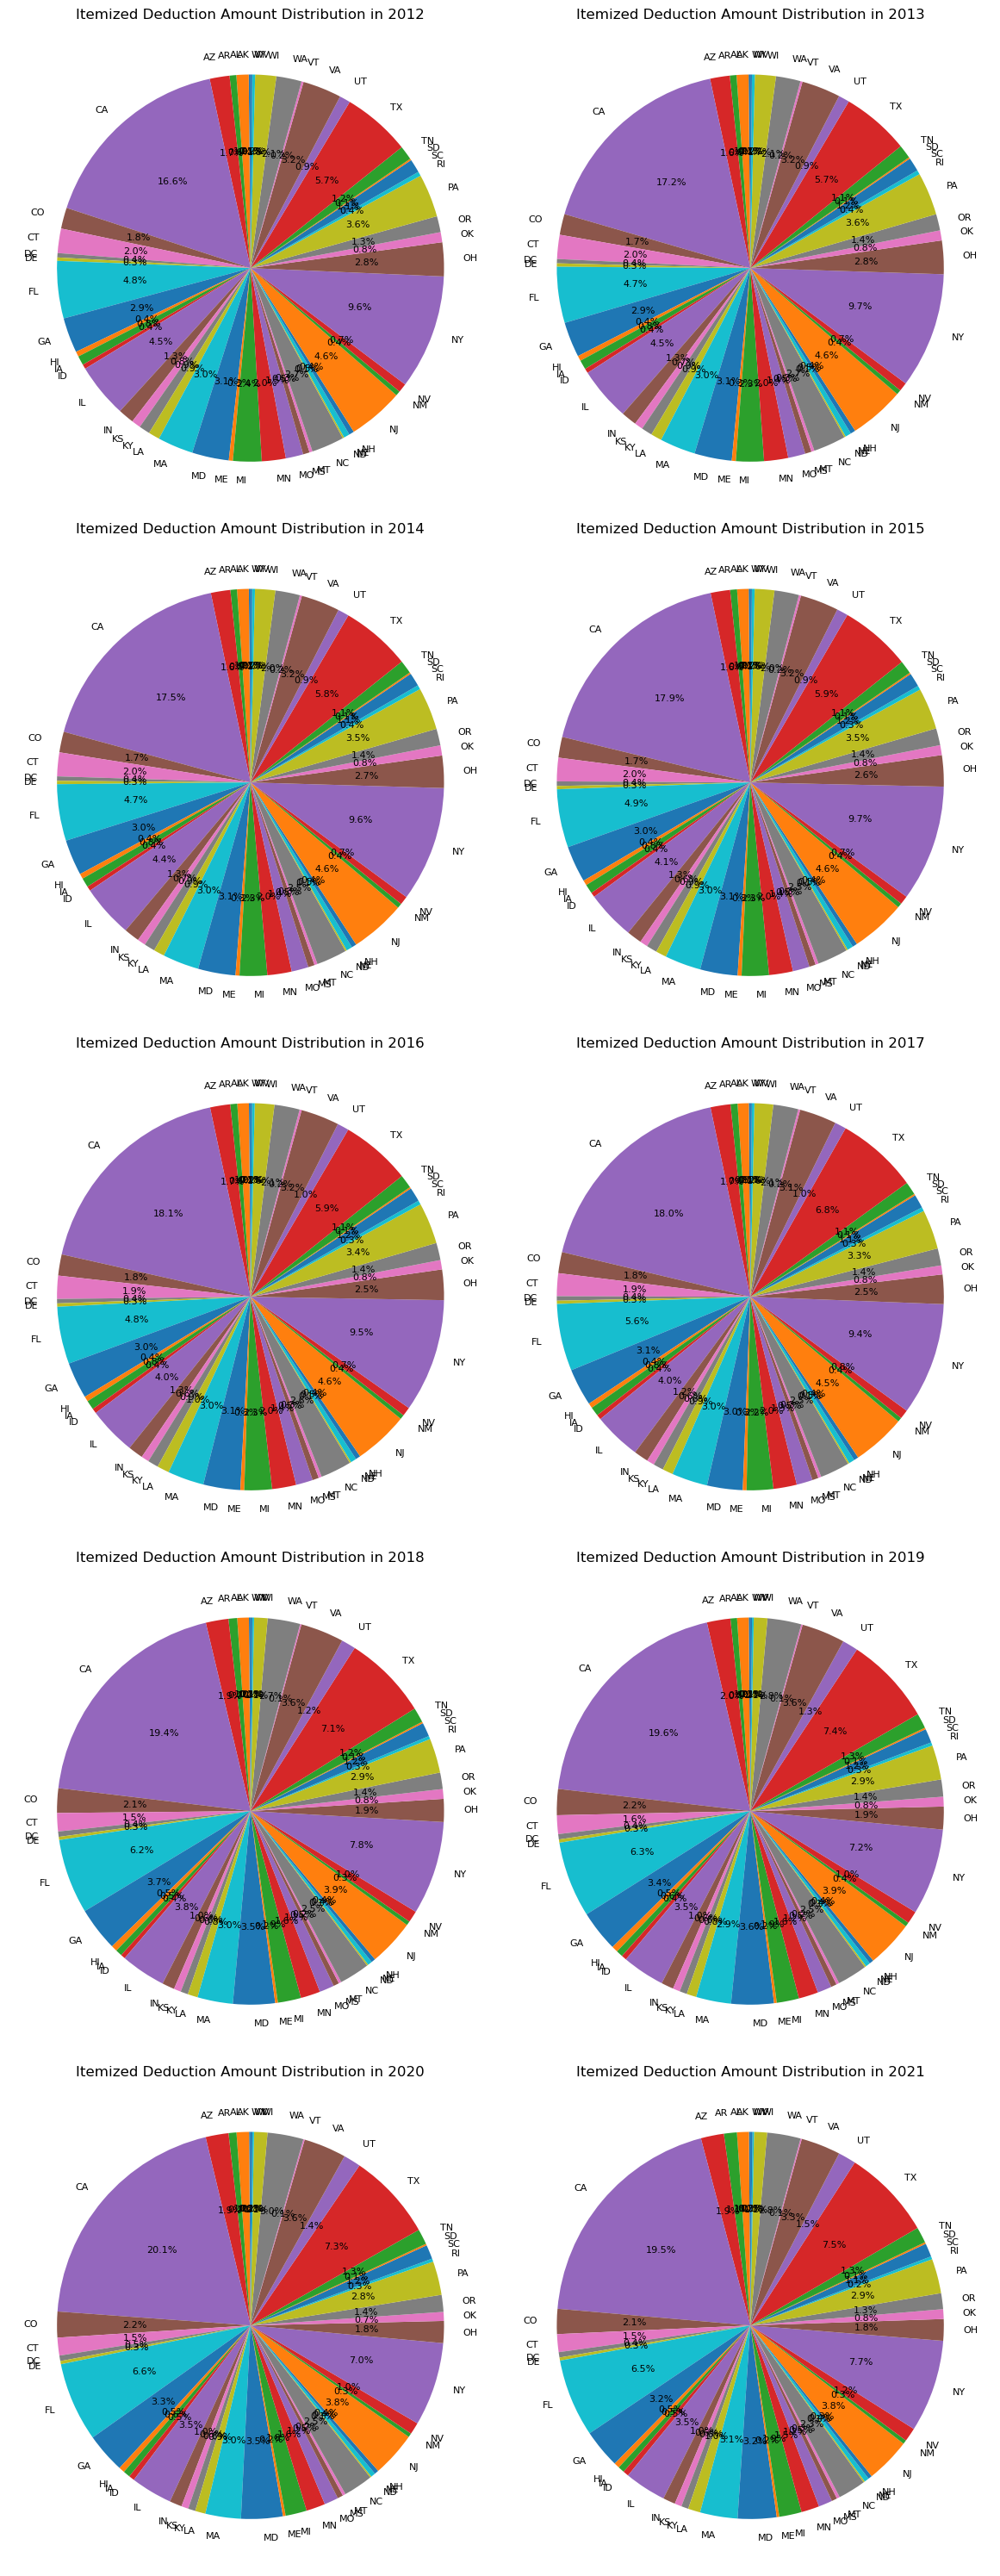

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('Data/combined_zpallagi.csv')

# Filter out rows where 'Itemized_Ded_Amt' or 'Returns' are null
filtered_data = data.dropna(subset=['Itemized_Ded_Amt', 'Returns'])

# Ensure 'year' column is an integer or a proper format if it's not already
filtered_data['year'] = filtered_data['year'].astype(int)

# Aggregate data by state and year
state_year_itemized_aggregated = filtered_data.groupby(['State', 'year']).agg({
    'Itemized_Ded_Amt': 'sum',
    'Returns': 'sum'
}).reset_index()

# Unique years
years = state_year_itemized_aggregated['year'].unique()

# Set up the plot with subplots arranged in a more spread out fashion
num_rows = len(years) // 2 + len(years) % 2  # Arrange into two columns if there are many years
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 6 * num_rows))  # Reduced figsize
axes = axes.flatten()  # Flatten if subplot grid to iterate easily

for i, year in enumerate(years):
    # Filter the data for the year
    year_data = state_year_itemized_aggregated[state_year_itemized_aggregated['year'] == year]
    
    # Create a pie chart
    ax = axes[i]
    wedges, texts, autotexts = ax.pie(year_data['Itemized_Ded_Amt'], labels=year_data['State'], autopct='%1.1f%%', startangle=90)
    
    # Adjust text size for better readability
    for autotext in autotexts:
        autotext.set_size(8)  # Smaller text size for percentages due to smaller charts
    for text in texts:
        text.set_size(8)  # Smaller text size for labels due to smaller charts
    
    ax.set_title(f'Itemized Deduction Amount Distribution in {year}', fontsize=12)

# Hide any unused subplots if the number of years is odd
if len(years) % 2 != 0:
    axes[-1].axis('off')

plt.tight_layout()
plt.show()


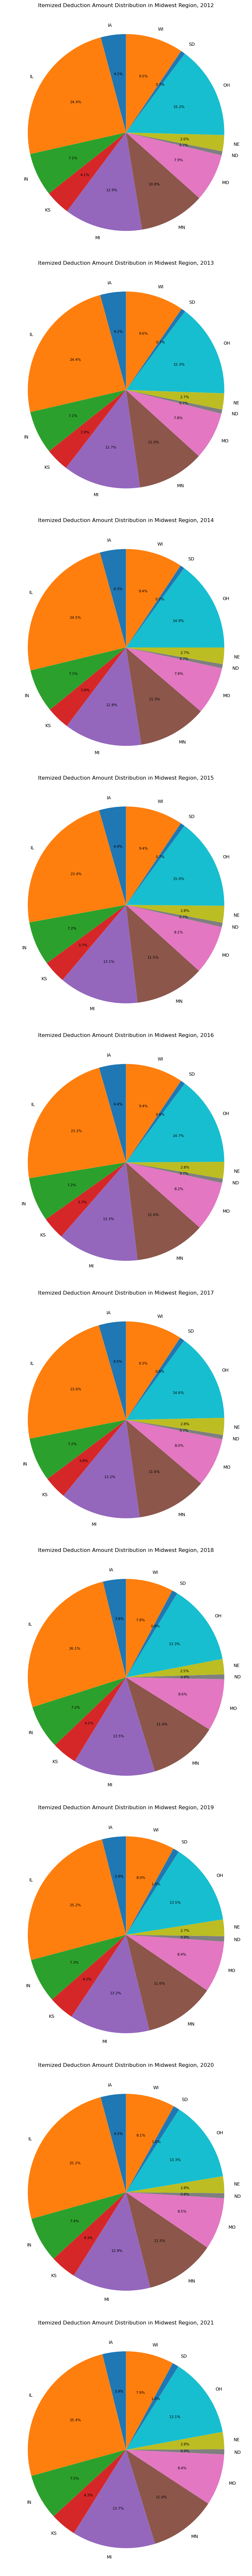

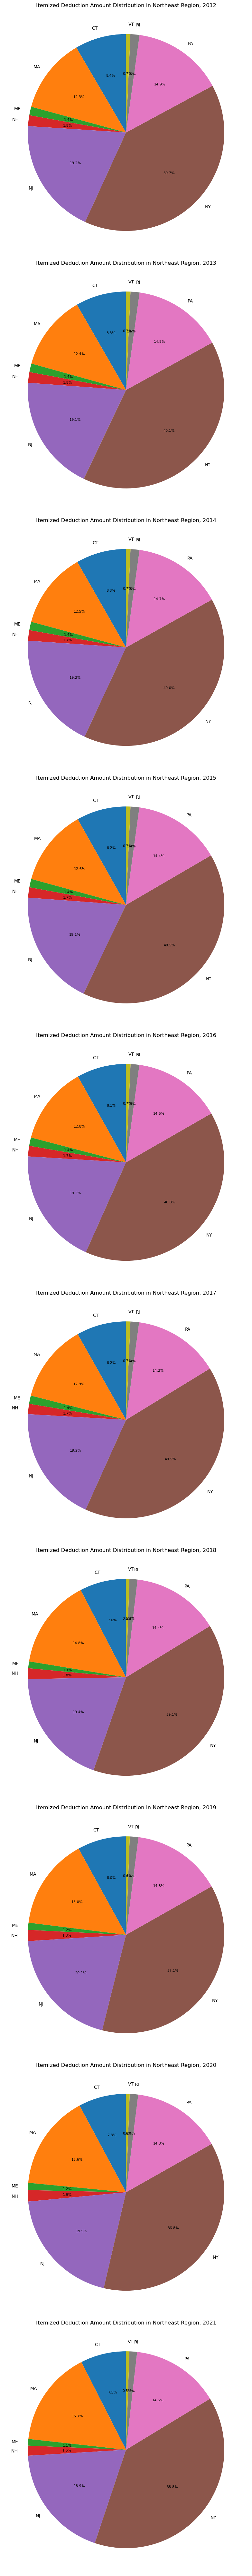

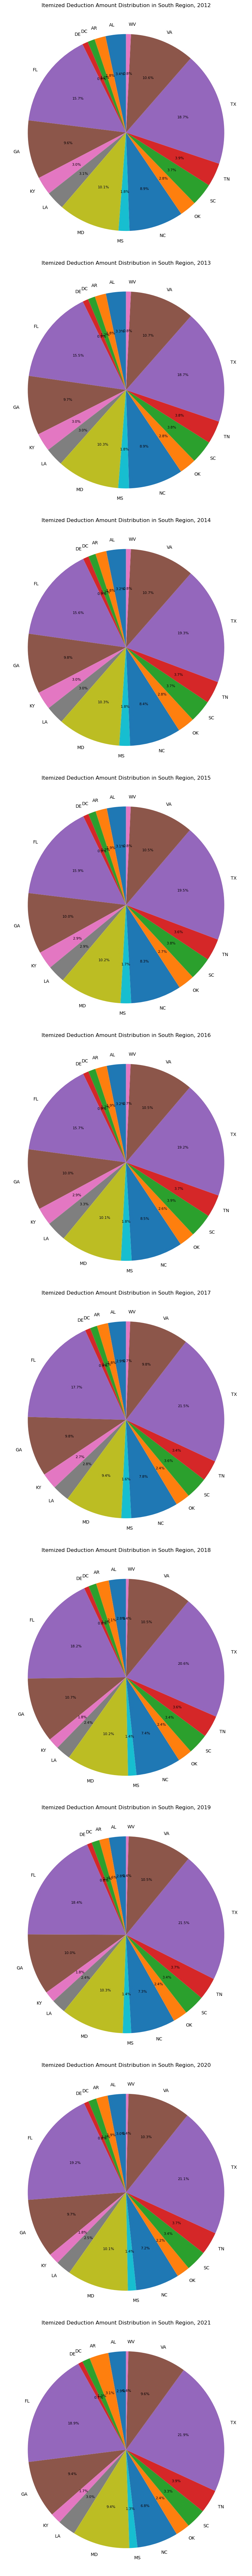

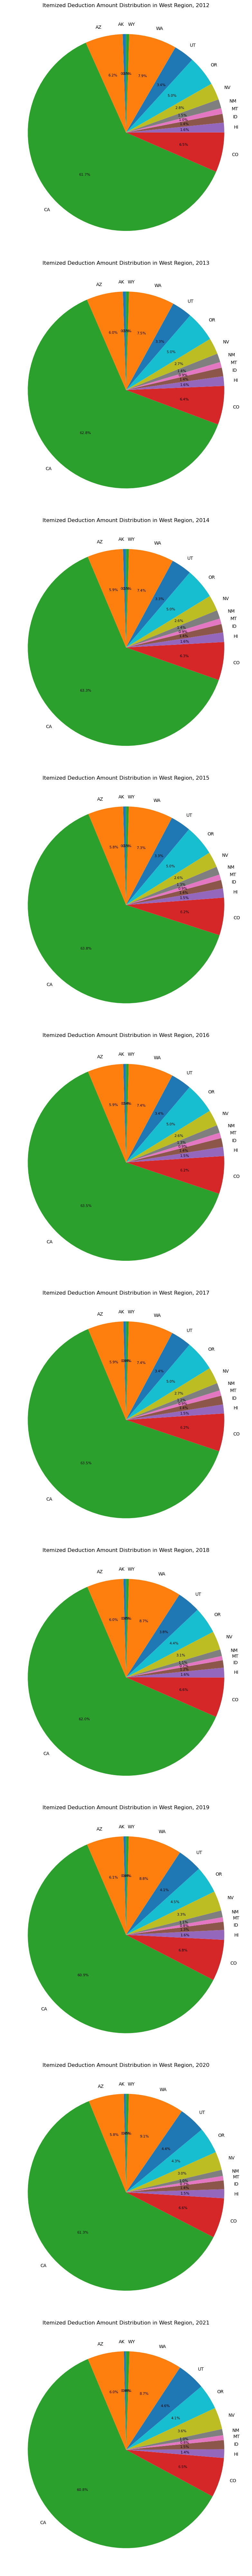

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Define region mapping
region_mapping = {
    'Northeast': ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA'],
    'Midwest': ['ND', 'SD', 'NE', 'KS', 'MN', 'IA', 'MO', 'WI', 'IL', 'MI', 'IN', 'OH'],
    'South': ['DE', 'MD', 'DC', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL', 'KY', 'TN', 'MS', 'AL', 'OK', 'TX', 'AR', 'LA'],
    'West': ['ID', 'MT', 'WY', 'NV', 'UT', 'CO', 'AZ', 'NM', 'AK', 'WA', 'OR', 'CA', 'HI']
}

# Load your data
data = pd.read_csv('Data/combined_zpallagi.csv')

# Filter out rows where 'Itemized_Ded_Amt' or 'Returns' are null
filtered_data = data.dropna(subset=['Itemized_Ded_Amt', 'Returns'])

# Ensure 'year' column is an integer or a proper format if it's not already
filtered_data['year'] = filtered_data['year'].astype(int)

# Map states to regions
filtered_data['Region'] = filtered_data['State'].map(lambda x: next((k for k, v in region_mapping.items() if x in v), 'Other'))

# Aggregate data by region, state, and year
region_state_year_aggregated = filtered_data.groupby(['Region', 'State', 'year']).agg({
    'Itemized_Ded_Amt': 'sum',
    'Returns': 'sum'
}).reset_index()

# Plotting by region and year
unique_regions = region_state_year_aggregated['Region'].unique()
unique_years = region_state_year_aggregated['year'].unique()

# Set up the plots
for region in unique_regions:
    fig, axes = plt.subplots(nrows=len(unique_years), figsize=(10, 8 * len(unique_years)))  # Adjust figure size
    axes = axes.flatten() if len(unique_years) > 1 else [axes]  # Make sure axes is always iterable

    for i, year in enumerate(unique_years):
        regional_data = region_state_year_aggregated[(region_state_year_aggregated['Region'] == region) & (region_state_year_aggregated['year'] == year)]
        
        # Create a pie chart
        ax = axes[i]
        wedges, texts, autotexts = ax.pie(regional_data['Itemized_Ded_Amt'], labels=regional_data['State'], autopct='%1.1f%%', startangle=90)
        
        # Increase the size of the autopct labels
        for autotext in autotexts:
            autotext.set_size(8)  # Adjust text size as needed

        ax.set_title(f'Itemized Deduction Amount Distribution in {region} Region, {year}')

    plt.tight_layout()
    plt.show()


In [40]:
# Calculate the percentage of Std_Ded_Returns relative to Returns
df['Percentage'] = (df['Std_Ded_Returns'] / df['Returns'])

# Group data by 'State' and 'Year'
grouped = df.groupby(['State', 'year']).sum()

grouped
# Plotting
#for (state, year), group in grouped.groupby(level=[0, 1]):
    # Creating a pie chart for each group
    #plt.figure(figsize=(8, 6))
    #group['Percentage'].plot(kind='pie', autopct='%1.1f%%')
    #plt.title(f'Percentage of Standard Deduction Returns in {state}, {year}')
    #plt.ylabel('')  # Removing the y-label as it's unnecessary for pie charts
    #plt.show()

    # Creating a bar chart for each group
    #plt.figure(figsize=(10, 6))
    #group['Percentage'].plot(kind='bar', color='skyblue')
    #plt.title(f'Percentage of Standard Deduction Returns by Year in {state}')
    #plt.xlabel('Year')
   # plt.ylabel('Percentage')
  #  plt.xticks(rotation=45)  # Rotating the x-axis labels for better visibility
  #  plt.show()

id  new_agi_stub   Returns    Single     Joint  Hd_of_Hshld  \
State year                                                                   
AK    2012     51          21.0  358990.0  183150.0  130300.0      37070.0   
      2013   1887          21.0  355150.0  181710.0  127490.0      37410.0   
      2014   3723          21.0  357640.0  183950.0  128080.0      36910.0   
      2015   5559          21.0  358650.0  183640.0  128750.0      37620.0   
      2016   7395          21.0  344240.0  173420.0  125440.0      37000.0   
...           ...           ...       ...       ...       ...          ...   
WY    2017  10995          21.0  266070.0  123390.0  111280.0      26170.0   
      2018  12831          21.0  268140.0  124870.0  111900.0      26000.0   
      2019  14667          21.0  274980.0  130500.0  112130.0      26470.0   
      2020  16503          21.0  276680.0  133120.0  112070.0      25470.0   
      2021  18339          21.0  274770.0  132060.0  111450.0      25310.0   

               AGI_Amt  Total_Inc_Returns  Total_Inc_Amt  \
State year                                                 
AK    2012  22865759.0                0.0            0.0   
      2013  23033908.0           355150.0     23381582.0   
      2014  24376795.0           357640.0     24722110.0   
      2015  25157135.0           358650.0     25508818.0   
      2016  23714276.0           344240.0     24044661.0   
...                ...                ...            ...   
WY    2017  20574616.0           266070.0     20853398.0   
      2018  22143383.0           268130.0     22379489.0   
      2019  23971969.0           274970.0     24210772.0   
      2020  25940448.0           276680.0     26184105.0   
      2021  31499900.0           274760.0     31729134.0   

            Std_Ded_Charity_Returns  Std_Ded_Charity_Amt  Std_Ded_Returns  \
State year                                                                  
AK    2012                      0.0                  0.0              0.0   
      2013                      0.0                  0.0              0.0   
      2014                      0.0                  0.0              0.0   
      2015                      0.0                  0.0              0.0   
      2016                      0.0                  0.0              0.0   
...                             ...                  ...              ...   
WY    2017                      0.0                  0.0              0.0   
      2018                      0.0                  0.0         250450.0   
      2019                      0.0                  0.0         257460.0   
      2020                  67220.0              17386.0         261340.0   
      2021                  76500.0              29962.0         259930.0   

            Std_Ded_Amt  Itemized_Ded_Returns  Itemized_Ded_Amt  \
State year                                                        
AK    2012          0.0               87510.0         1795050.0   
      2013          0.0               82370.0         1652072.0   
      2014          0.0               79760.0         1614778.0   
      2015          0.0               80270.0         1664004.0   
      2016          0.0               79280.0         1652515.0   
...                 ...                   ...               ...   
WY    2017          0.0               59570.0         1710573.0   
      2018    4350523.0               16700.0          904523.0   
      2019    4547033.0               16590.0          863288.0   
      2020    4717099.0               14470.0          866190.0   
      2021    4760175.0               13980.0         1087007.0   

            Charitable_Returns  Charitable_Amt  Percentage  
State year                                                  
AK    2012             62620.0        306482.0    0.000000  
      2013             59160.0        302533.0    0.000000  
      2014             57610.0        317473.0    0.000000  
      2015             57580.0        32

# K is what percent of B...

In [41]:
# I against B and K against B


# I is what percent of B...